In [183]:
# Many inputs to output
inputs = [8.5, 0.65, 1.2]
weights = [0.1,0.2,-0.1]
goal_prediction = 1
alpha = 0.01

def NeuralNetwork(inputs, weights):
    assert( len(inputs) == len(weights))
    prediction = 0
    
    for i in range(len(inputs)):
        prediction += inputs[i] * weights[i]
        
    return prediction

def ele_wise_mul(vector, scaler):
    output_vector = []
    
    for i in range(len(vector)):
        output_vector.append(vector[i] * scaler)
    
    return output_vector

def run(inputs, weights, alpha):
    weight_delta_set = []
    error_set = []
    
    for i in range(20):
        pred = NeuralNetwork(inputs, weights)
        error = (pred - goal_prediction) ** 2
        delta = (pred - goal_prediction)
        weight_deltas = ele_wise_mul(inputs, delta)
        # We can train this network even without this node -> 8.5 node
        # This is a damaging effect in the neural network
        # If the network could find a way to train it without this node then useful information will be LOST
        # Ex: Look below line, this makes the first node weight update to 0
        #weight_deltas[0] = 0
        
        for j in range(len(weights)):
            weights[j] -= weight_deltas[j] * alpha
        
        weight_delta_set.append(list(weights))
        error_set.append(error)
        
        print("Iteration: %s, Error: %s, Prediction: %s" % (str(i), error, pred))
        
    return weight_delta_set, error_set

In [184]:
weight_set, error_set = run(inputs, weights, alpha)

Iteration: 0, Error: 0.01959999999999997, Prediction: 0.8600000000000001
Iteration: 1, Error: 0.0013135188062500048, Prediction: 0.9637574999999999
Iteration: 2, Error: 8.802712522307997e-05, Prediction: 0.9906177228125002
Iteration: 3, Error: 5.899249206154892e-06, Prediction: 0.997571162993086
Iteration: 4, Error: 3.953456517877471e-07, Prediction: 0.9993712348198351
Iteration: 5, Error: 2.6494589213863218e-08, Prediction: 0.9998372284139849
Iteration: 6, Error: 1.7755684283936714e-09, Prediction: 0.9999578625056702
Iteration: 7, Error: 1.189919654307157e-10, Prediction: 0.9999890916561555
Iteration: 8, Error: 7.974397162950331e-12, Prediction: 0.9999971761024872
Iteration: 9, Error: 5.344143185591192e-13, Prediction: 0.9999992689635313
Iteration: 10, Error: 3.581445191241023e-14, Prediction: 0.9999998107529342
Iteration: 11, Error: 2.4001508278382324e-15, Prediction: 0.9999999510086658
Iteration: 12, Error: 1.6084914741122043e-16, Prediction: 0.9999999873173683
Iteration: 13, Error:

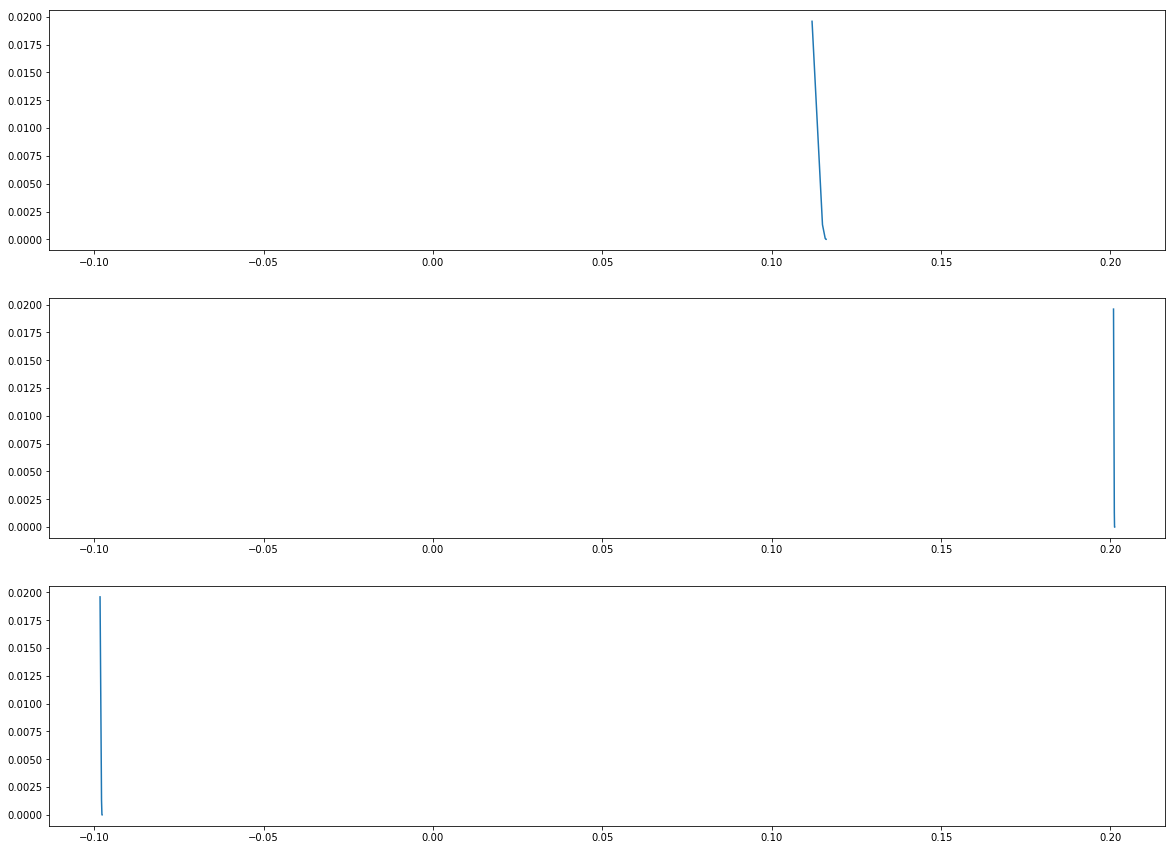

In [185]:
import numpy as np
import matplotlib.pyplot as plt

weight_set = np.array(weight_set)
error_set = np.array(error_set)

node1_weights = weight_set[:,0]
node2_weights = weight_set[:,1]
node3_weights = weight_set[:,2]

node1_indices = node1_weights.argsort()
node1_weights = node1_weights[node1_indices]
error1_set = error_set[node1_indices]

node2_indices = node2_weights.argsort()
node2_weights = node2_weights[node2_indices]
error2_set = error_set[node2_indices]

node3_indices = node3_weights.argsort()
node3_weights = node3_weights[node3_indices]
error3_set = error_set[node3_indices]

plt.figure(figsize=(20,15))
ax1 = plt.subplot(311)
plt.plot(node1_weights, error1_set)

ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
plt.plot(node2_weights, error2_set)

ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(node3_weights, error3_set)

plt.show()

In [201]:
# Single input to Many Outputs

inputs = 0.9
weights = [0.3,0.2,0.8]
targets = [0.1, 1, 0.1]
alpha = 0.1

def NeuralNetwork(inputs, weights):
    prediction = []
    for i in range(len(weights)):
        prediction.append(inputs * weights[i])
    
    return prediction

def ele_wise_mul(vector, scaler):
    output = []
    for i in range(len(vector)):
        output.append(vector[i] * scaler)
    return output

def run(inputs, weights, targets, alpha):
    
    for k in range(10):
        prediction = NeuralNetwork(inputs, weights)
        errors = [(prediction[i] - targets[i])** 2 for i in range(len(targets))]
        delta = [prediction[i] - targets[i] for i in range(len(targets))]
        weight_deltas = ele_wise_mul(delta, inputs)

        for i in range(len(weights)):
            weights[i] -= weight_deltas[i]

        print("Iteration: %s, Error: %s, Prediction: %s" % (str(i), errors, prediction))
    
run(inputs, weights, targets, alpha)

Iteration: 2, Error: [0.028900000000000006, 0.6723999999999999, 0.38440000000000013], Prediction: [0.27, 0.18000000000000002, 0.7200000000000001]
Iteration: 2, Error: [0.001043289999999998, 0.024273640000000016, 0.013876839999999977], Prediction: [0.13229999999999997, 0.8442, 0.2177999999999999]
Iteration: 2, Error: [3.7662768999999874e-05, 0.0008762784040000011, 0.0005009539239999981], Prediction: [0.106137, 0.970398, 0.12238199999999996]
Iteration: 2, Error: [1.3596259608999965e-06, 3.163365038440107e-05, 1.808443665639993e-05], Prediction: [0.10116603, 0.9943756199999999, 0.10425258]
Iteration: 2, Error: [4.9082497188492636e-08, 1.1419747788770234e-06, 6.528481632960355e-07], Prediction: [0.10022154570000001, 0.9989313677999999, 0.1008079902]
Iteration: 2, Error: [1.771878148504222e-09, 4.1225289517448374e-08, 2.3567818694988758e-08], Prediction: [0.100042093683, 0.999796959882, 0.10015351813800001]
Iteration: 2, Error: [6.396480116094691e-11, 1.488232951587767e-09, 8.50798254888308

In [303]:
# Many inputs to many outputs
inputs = [8.5, 0.65, 1.2]
weights = [[0.1,0.1,0.0],[0.1,0.2,1.3],[-0.3,0.0,0.1]]
targets = [0.1,0,0.1]
alpha = 0.01

def NeuralNetwork(inputs, weights):
    predictions = []
    
    for i in range(len(inputs)):
        output = 0
        for j in range(len(weights)):
            output += inputs[j] * weights[j][i]
        predictions.append(output)
    
    return predictions

def ele_wise_mul(vector1, vector2):
    output = []
    output_vector = []
    
    for i in range(len(vector1)):
        for j in range(len(vector2)):
            output.append(vector1[i] * vector2[j])
        output_vector.append(output)
    
    return output_vector

def run(inputs, weights, targets, alpha):
    
    for i in range(20):

        prediction = NeuralNetwork(inputs, weights)
        errors = [(prediction[i] - targets[i])**2 for i in range(len(targets))]
        delta = [(prediction[i] - targets[i]) for i in range(len(targets))]
        weight_deltas = ele_wise_mul(delta, inputs)

        for j in range(len(weights)):
            for k in range(len(weights[0])):
                weights[k][j] -= weight_deltas[j][k] * alpha

        print("Iteration: %s, Error: %s, Prediction: %s" % (str(i), errors, prediction))

In [304]:
run(inputs, weights, targets, alpha)

Iteration: 0, Error: [0.20702500000000007, 0.9604000000000001, 0.7482250000000001], Prediction: [0.555, 0.9800000000000001, 0.9650000000000001]
Iteration: 1, Error: [0.013874042391015624, 0.41317657364101557, 0.2785603048910156], Prediction: [0.217788125, 0.6427881249999999, 0.6277881249999999]
Iteration: 2, Error: [0.0009297865101688144, 0.30857180741251256, 0.19403355521485632], Prediction: [0.13049240085937502, 0.555492400859375, 0.540492400859375]
Iteration: 3, Error: [6.231081974001368e-05, 0.28397571710583414, 0.17463516144316613], Prediction: [0.10789372027247063, 0.5328937202724706, 0.5178937202724708]
Iteration: 4, Error: [4.175838447008419e-06, 0.2777748370157597, 0.16977983504358657], Prediction: [0.10204348683553588, 0.5270434868355359, 0.512043486835536]
Iteration: 5, Error: [2.79849098571812e-07, 0.27618073788637537, 0.16853406612582914], Prediction: [0.10052900765454936, 0.5255290076545494, 0.5105290076545494]
Iteration: 6, Error: [1.8754441524794124e-08, 0.2757688129538

In [312]:
x = np.arange(10,51,2)
x

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50])

In [316]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [319]:
x = np.random.rand(1)
x

array([ 0.17400593])

In [321]:
x = np.random.randn(25)
x

array([  7.72641751e-01,  -2.88767580e-01,  -4.48721049e-01,
         1.91096886e-01,   1.25301582e-02,   5.37261758e-01,
        -4.44553286e-01,   6.65079694e-01,   4.53556541e-01,
         6.86408717e-02,   1.17799760e+00,   1.26088696e-03,
         1.06973732e+00,  -8.31733982e-01,  -2.35134740e-01,
         1.24141279e-01,  -1.21418812e+00,  -6.81410805e-01,
        -7.31915717e-01,   1.79292793e+00,  -7.70783808e-01,
         1.27694222e+00,   2.40888348e+00,   2.15004795e+00,
        -1.87974500e-01])

In [322]:
np.arange(0.01,1.01,0.01)

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,  1.  ])

In [327]:
np.linspace(0, 1, 20)

array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])

In [331]:
x = np.arange(1,26).reshape(5,5)
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [342]:
np.sum(x, axis=1)

array([ 15,  40,  65,  90, 115])

In [346]:
np.random.seed(101)
np.random.rand(1)

array([ 0.51639863])

In [ ]:
np.arry(1,2,3)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import sys

In [2]:
filename = "train.csv"
data = pd.read_csv(filename, header=0)

dataset = data.values
training_data = dataset[:,1:] / 255.0
labels = dataset[:,0]

In [3]:
lb = LabelBinarizer()
lb.fit(labels)
labels = lb.transform(labels)

In [22]:
np.random.seed(1)

def relu(x):
    return (x > 0) * x

def relu2derivative(x):
    return (x > 0)

training_data = training_data[:1000]
hidden_size = 40
alpha = 0.005
iterations = 300
pixels_per_image = 784
num_labels = 10
errors = []

weights_0_1 = 0.2 * np.random.random((pixels_per_image, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1

for iteration in range(iterations):
    error = 0.0
    correct_cnt = 0
    for i in range(training_data.shape[0]):
        
        label = labels[i:i+1]
        layer_0 = training_data[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        
        correct_cnt += int(np.argmax(layer_2)) == np.argmax(label)
        error += np.sum((label - layer_2) ** 2)
        
        layer_2_delta = (layer_2 - label)
        layer_1_delta = (layer_2_delta.dot(weights_1_2.T) * relu2derivative(layer_1))

        weights_1_2 -= layer_1.T.dot(layer_2_delta) * alpha
        weights_0_1 -= layer_0.T.dot(layer_1_delta) * alpha
    
    errors.append(error)
    
    sys.stdout.write("\r" + "Iteration: " + str(iteration) + " Error: " + str(error) + " Correct Count: " + str(correct_cnt))

Iteration: 299 Error: 7.75357808253 Correct Count: 998

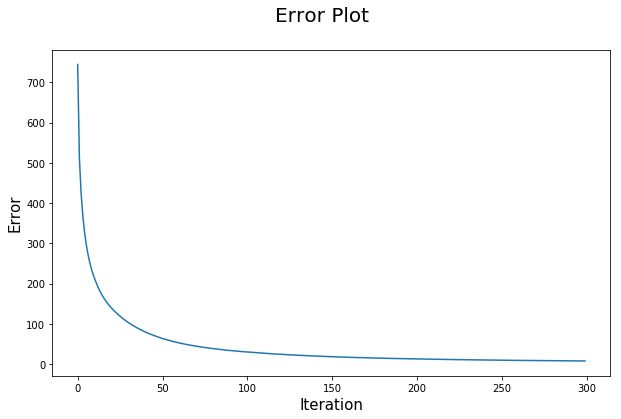

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
fig.suptitle("Error Plot", fontsize=20)
plt.plot(errors)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.show()